In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Import from scripts
sys.path.append("..") 
from src.data_loader import load_tsla_data
from scripts.arima import train_arima, forecast_arima, evaluate_arima, plot_results,preprocess_data

In [ ]:
tesla_data = load_tsla_data('../data/TSLA_cleaned.csv')  



2025-03-01 22:01:30,953 - INFO - Loading TSLA data from CSV...
2025-03-01 22:01:30,985 - INFO - Verifying TSLA data integrity...
2025-03-01 22:01:30,990 - INFO - TSLA data loaded successfully. Shape: (2505, 9), Missing values: 0


In [ ]:
tesla_data = preprocess_data(tesla_data)
tesla_data.head() 

,Price,Close,High,Low,Volume,Daily_Return,Rolling_Mean,Rolling_Std,Z_Score
Date,,,,,,,,,
2015-02-17,13.623333,13.713333,13.433333,13.713333,59694000.0,-0.140787,13.940933,0.583636,-0.895868
2015-02-18,13.630667,13.744667,13.506667,13.611333,40704000.0,0.228492,13.917978,0.577107,-0.895605
2015-02-19,14.114000,14.162667,13.583333,13.666667,77311500.0,3.041181,13.914067,0.574963,-0.892099
2015-02-20,14.474000,14.506667,13.987333,14.052000,89731500.0,2.428920,13.920333,0.580523,-0.889213
2015-02-23,13.822667,14.546667,13.755333,14.377333,127497000.0,0.275735,13.930111,0.588737,-0.888878


In [5]:
 # Train model
arima_model, arima_params = train_arima(tesla_data)
print(f"Optimized ARIMA Parameters: {arima_params}")


2025-03-01 22:01:36,806 - INFO - Starting ARIMA model training
2025-03-01 22:01:36,865 - INFO - Training period: 2015-02-17 to 2024-12-31


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16061.023, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16142.631, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16069.943, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16061.207, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16142.789, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16061.446, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16062.160, Time=1.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16060.466, Time=0.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16061.573, Time=0.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16061.815, Time=1.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16060.166, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16060.793, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16061.888, Time=0.92 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=16061.336, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0

2025-03-01 22:01:46,470 - INFO - Best ARIMA parameters: (0, 1, 2)


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=16061.157, Time=0.81 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 9.577 seconds
Optimized ARIMA Parameters: (0, 1, 2)


In [7]:
# 2. Prepare test data
test_data = tesla_data['2025-01-01':'2025-01-31']['Close']

# 3. Generate forecast
forecast = forecast_arima(arima_model, test_data)

2025-03-01 22:03:02,775 - INFO - Forecasting 22 steps
2025-03-01 22:03:02,893 - INFO - Forecast completed successfully


2025-03-01 22:03:43,546 - INFO - MAE: 15.31, RMSE: 18.87, MAPE: 3.76%


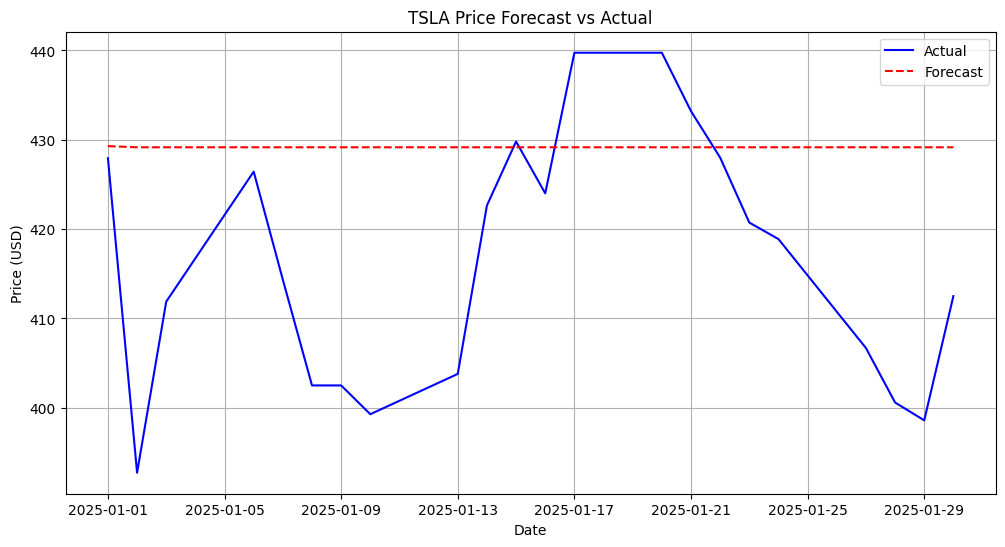

In [9]:
# Evaluate and plot
evaluate_arima(test_data, forecast)
plot_results(test_data, forecast)

In [10]:
print("Forecast Sample:")
print(forecast.head())

Forecast Sample:
Date
2025-01-01    429.282711
2025-01-02    429.156398
2025-01-03    429.156398
2025-01-06    429.156398
2025-01-07    429.156398
Freq: B, dtype: float64
